In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('dados_churn.csv')

print("Primeiras 5 linhas")
display(df.head())

print("\nInformações dos dados:")
df.info()

Primeiras 5 linhas


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Informações dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

In [2]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.dropna(inplace=True)
df = df.drop(columns=['customerID'])

le = LabelEncoder()

for coluna in df.columns:
    if df[coluna].dtype == 'object':
        df[coluna] = le.fit_transform(df[coluna])

print("Dados transformados")
display(df.head())

Dados transformados


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.dropna(inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for coluna in df.columns:
    if df[coluna].dtype == 'object':
        df[coluna] = le.fit_transform(df[coluna])

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Regressão Logística")
modelo_log = LogisticRegression(max_iter=2000)
modelo_log.fit(X_train, y_train)
previsao_log = modelo_log.predict(X_test)

print("Random Forest")
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
previsao_rf = modelo_rf.predict(X_test)

print("Modelos treinados")

Regressão Logística
Random Forest
Modelos treinados


Acurácia Regressão Logística: 0.79
Acurácia Random Forest: 0.79


/tmp/ipython-input-294280450.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Acurácia', data=resultados, palette='viridis')


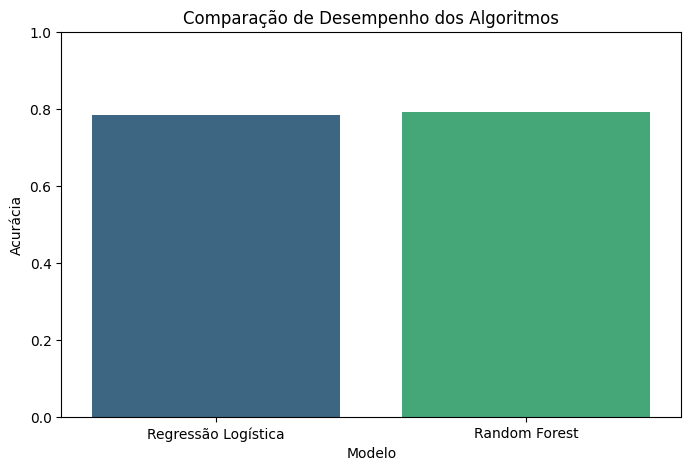


Relatório detalhado do Random Forest
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Relatório detalhado da Regressão Logística
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [6]:
acc_log = accuracy_score(y_test, previsao_log)
acc_rf = accuracy_score(y_test, previsao_rf)

print(f"Acurácia Regressão Logística: {acc_log:.2f}")
print(f"Acurácia Random Forest: {acc_rf:.2f}")

resultados = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest'],
    'Acurácia': [acc_log, acc_rf]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Modelo', y='Acurácia', data=resultados, palette='viridis')
plt.title('Comparação de Desempenho dos Algoritmos')
plt.ylim(0, 1)
plt.show()

print("\nRelatório detalhado do Random Forest")
print(classification_report(y_test, previsao_rf))

print("\nRelatório detalhado da Regressão Logística")
print(classification_report(y_test, previsao_log))

Acurácia Regressão Logística: 78.54%
Acurácia Random Forest: 79.25%


/tmp/ipython-input-2499553916.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algoritmo', y='Acurácia', data=resultados, palette='viridis')


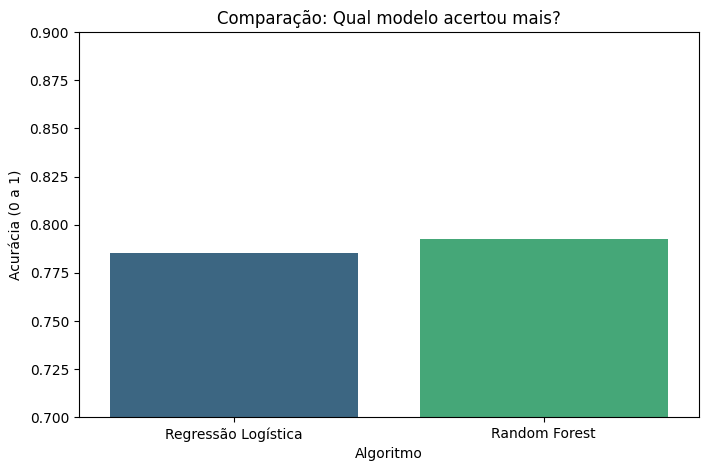


Detalhes do Modelo Random Forest


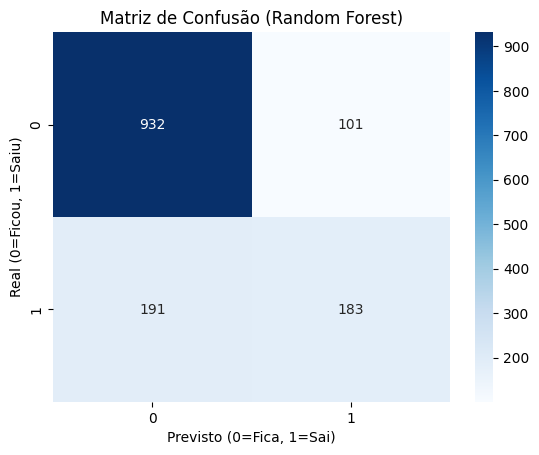


Detalhes da Regressão Logística


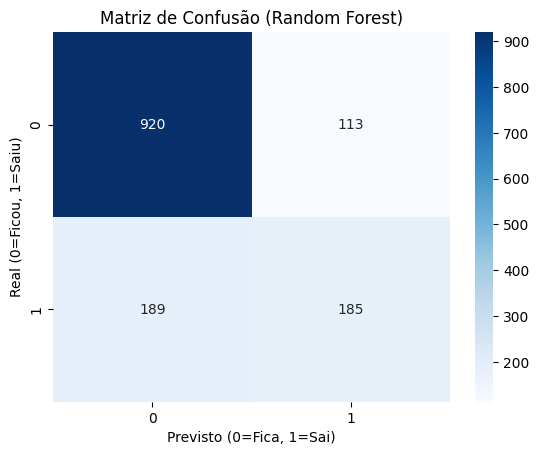

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc_log = accuracy_score(y_test, previsao_log)
acc_rf = accuracy_score(y_test, previsao_rf)

print(f"Acurácia Regressão Logística: {acc_log*100:.2f}%")
print(f"Acurácia Random Forest: {acc_rf*100:.2f}%")

resultados = pd.DataFrame({
    'Algoritmo': ['Regressão Logística', 'Random Forest'],
    'Acurácia': [acc_log, acc_rf]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Algoritmo', y='Acurácia', data=resultados, palette='viridis')
plt.title('Comparação: Qual modelo acertou mais?')
plt.ylabel('Acurácia (0 a 1)')
plt.ylim(0.7, 0.9)
plt.show()

print("\nDetalhes do Modelo Random Forest")
cm = confusion_matrix(y_test, previsao_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão (Random Forest)')
plt.xlabel('Previsto (0=Fica, 1=Sai)')
plt.ylabel('Real (0=Ficou, 1=Saiu)')
plt.show()

print("\nDetalhes da Regressão Logística")
cm = confusion_matrix(y_test, previsao_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão (Random Forest)')
plt.xlabel('Previsto (0=Fica, 1=Sai)')
plt.ylabel('Real (0=Ficou, 1=Saiu)')
plt.show()